# --- Day 6: Chronal Coordinates ---

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

In [2]:
%matplotlib inline

In [4]:
with open('input/day6.txt') as f:
    points = []
    for line in f:
        a,b = re.findall(r'[0-9]+', line)
        points.append((int(a),int(b)))

In [5]:
arr = np.array(points)
matrix = np.zeros((max(arr[:,0])+50, max(arr[:,1])+50), dtype=int)

In [6]:
# testing with example from exercise
'''
points = [(1, 1),
(1, 6),
(8, 3),
(3, 4),
(5, 5),
(8, 9)]
arr = np.array(points)
matrix = np.zeros((10,10), dtype=int)
'''
print('not testing')

not testing


In [7]:
def distance(p1, p2):
    return np.abs(p1[0] - p2[0]) + np.abs(p1[1] - p2[1])

def nearest(points, p):
    occ = defaultdict(list)
    for c, point in enumerate(points):
        dist = distance(p, point)
        occ[dist].append(c+1)
    if len(occ[min(occ)]) > 1:
        near = 0
    else:
        near = occ[min(occ)][0]
    return int(near)        

In [8]:
a, b = matrix.shape
for i in range(a):
    for j in range(b):
        matrix[i,j] = nearest(points, (i,j))

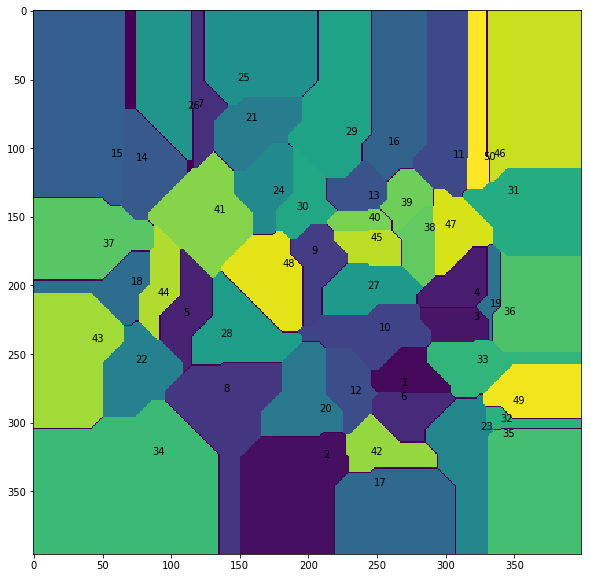

In [9]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(np.transpose(matrix))
#plt.scatter(arr[:,1], arr[:,0], c='r')
for t, point in enumerate(points):
    plt.text(x=point[0], y=point[1], s=str(t+1))

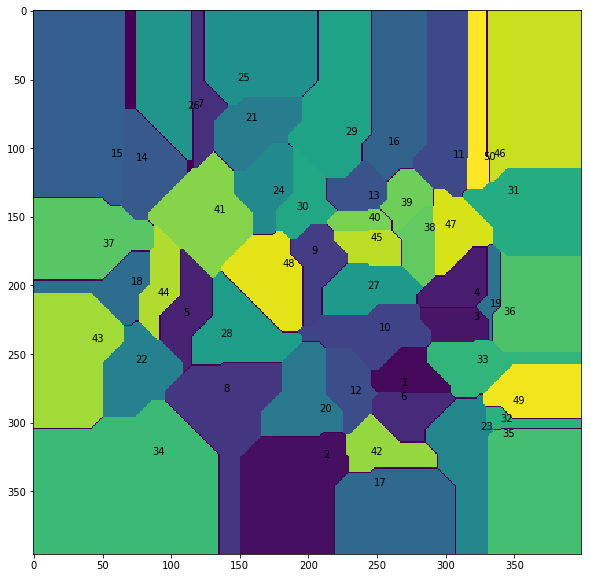

In [10]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(np.transpose(matrix))
#plt.scatter(arr[:,1], arr[:,0], c='r')
for t, point in enumerate(points):
    plt.text(x=point[0], y=point[1], s=str(t+1))

In [11]:
edges = np.unique(np.concatenate((matrix[:,[0,-1]].flatten(),matrix[[0,-1],:].flatten())))

In [12]:
bincount = np.bincount(matrix.flatten())

In [13]:
top = 0
for i, b in enumerate(bincount):
    if (not i in edges) & (b > top ):
        top = b
        index = i

In [14]:
print('area {} consists of {} patches'.format(index, top))

area 41 consists of 3840 patches


## --- Part Two ---

In [15]:
def proximity(points, p):
    sum = 0
    for point in points:
        sum += distance(point, p)
    if sum < 10000:
        return 1
    return 0

In [16]:
a, b = matrix.shape
for i in range(a):
    for j in range(b):
        matrix[i,j] = proximity(points, (i,j))

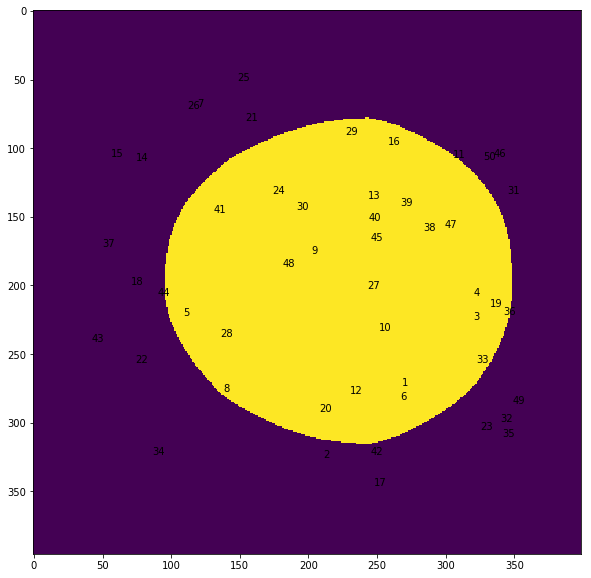

In [17]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(np.transpose(matrix))
#plt.scatter(arr[:,1], arr[:,0], c='r')
for t, point in enumerate(points):
    plt.text(x=point[0], y=point[1], s=str(t+1))

In [18]:
np.bincount(matrix.flatten())[1]

46542